In [84]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [45]:
A549_replicate5 = pd.read_csv("A549_directRNA_replicate5_run1.csv")
A549_replicate6 = pd.read_csv("A549_directRNA_replicate6_run1.csv")
Hct116_replicate3run1 = pd.read_csv("Hct116_directRNA_replicate3_run1.csv")
Hct116_replicate3run4 = pd.read_csv("Hct116_directRNA_replicate3_run4.csv")
Hct116_replicate4 = pd.read_csv("Hct116_directRNA_replicate4_run3.csv")
HepG2_replicate5 = pd.read_csv("HepG2_directRNA_replicate5_run2.csv")
HepG2_replicate6 = pd.read_csv("HepG2_directRNA_replicate6_run1.csv")
K562_replicate4 = pd.read_csv("K562_directRNA_replicate4_run1.csv")
K562_replicate5 = pd.read_csv("K562_directRNA_replicate5_run1.csv")
K562_replicate6 = pd.read_csv("K562_directRNA_replicate6_run1.csv")
MCF7_replicate3 = pd.read_csv("MCF7_directRNA_replicate3_run1.csv")
MCF7_replicate4 = pd.read_csv("MCF7_directRNA_replicate4_run1.csv")

For the below: due to file size (total ~6GB, data here is not pushed to github. The way to generate this data is shown in part_c_merged_data.ipynb.

In [46]:
A549_replicate5_read = pd.read_csv("A549_directRNA_replicate5_run1_reading.csv")
A549_replicate6_read = pd.read_csv("A549_directRNA_replicate6_run1_reading.csv")
Hct116_replicate3run1_read = pd.read_csv("Hct116_directRNA_replicate3_run1_reading.csv")
Hct116_replicate3run4_read = pd.read_csv("Hct116_directRNA_replicate3_run4_reading.csv")
Hct116_replicate4_read = pd.read_csv("Hct116_directRNA_replicate4_run3_reading.csv")
HepG2_replicate5_read = pd.read_csv("HepG2_directRNA_replicate5_run2_reading.csv")
HepG2_replicate6_read = pd.read_csv("HepG2_directRNA_replicate6_run1_reading.csv")
K562_replicate4_read = pd.read_csv("K562_directRNA_replicate4_run1_reading.csv")
K562_replicate5_read = pd.read_csv("K562_directRNA_replicate5_run1_reading.csv")
K562_replicate6_read = pd.read_csv("K562_directRNA_replicate6_run1_reading.csv")
MCF7_replicate3_read = pd.read_csv("MCF7_directRNA_replicate3_run1_reading.csv")
MCF7_replicate4_read = pd.read_csv("MCF7_directRNA_replicate4_run1_reading.csv")

# Which features differ between modified and unmodified sites? Does this look similar across the cell lines?
--- 
This workbook aims to address 2 questions: 
1. Which features differ between modified and unmodified sites? 
2. Does this look similar across the cell lines?

Workflow: 

To begine with, we need to understand what are the features we are using that could potentially difer between modified and unmodified sites: 
1. Length of the direct RNA-Seq signal of the 5-mer nucleotides (dwelling time) (left, center, right)
2. Standard deviation of the direct RNA-Seq signal (left, center, right)
3. Mean of the direct RNA-Seq signal (left, center, right)

Given enough time, it is worthy to study all 9 features and how they differ. However, given the limited time of this project, we will only study the center value for now. So total 3 features to study. 

We are going to plot for each of the middle 5-mer of the sequence (which we will have maximum 18 of them), how the feature's distribution looks like for modified and unmodified transcripts, horizontally comparing all cell lines, using box plot. We will then repeat this process for all the 3 features we are interested in, having maximum of 18 x 3 graphs. We will select some that have an obvious difference to discuss. 

It is also worthy to combine all cell's data together to have an overview picture of how the distribution is like. Hence, we can choose to union all data together 




### Process prediction data 
---

In [47]:
df_list = [A549_replicate5, 
            A549_replicate6, 
            Hct116_replicate3run1, 
            Hct116_replicate3run4, 
            Hct116_replicate4, 
            HepG2_replicate5, 
            HepG2_replicate6, 
            K562_replicate4, 
            K562_replicate5, 
            K562_replicate6, 
            MCF7_replicate3, 
            MCF7_replicate4] 

df_name_list = ['A549_replicate5', 
                'A549_replicate6', 
                'Hct116_replicate3run1', 
                'Hct116_replicate3run4', 
                'Hct116_replicate4', 
                'HepG2_replicate5', 
                'HepG2_replicate6', 
                'K562_replicate4', 
                'K562_replicate5', 
                'K562_replicate6', 
                'MCF7_replicate3', 
                'MCF7_replicate4'] 

In [48]:
# add in labels to identify which csv the data comes from 
for i in range(len(df_name_list)):
    cell_line = df_name_list[i].split("_")[0]
    replicate = df_name_list[i].split("_")[1]
    df_list[i]['cell_line'] = cell_line 
    df_list[i]['replicate'] = replicate

In [49]:
# union all data together, assuming duplicates are valid because they will be from different readings 
# removing those whose transcript_id start with R, ignoring them for now 
combined_df = pd.concat(df_list, ignore_index=True)
combined_df = combined_df[~combined_df['transcript_id'].str.startswith('R')]
combined_df

,transcript_id,transcript_position,probability,cell_line,replicate
0,ENST00000418539,108,0.086347,A549,replicate5
1,ENST00000418539,139,0.023725,A549,replicate5
2,ENST00000383898,75,0.031375,A549,replicate5
3,ENST00000610460,78,0.051127,A549,replicate5
4,ENST00000619779,78,0.050027,A549,replicate5
...,...,...,...,...,...
15803529,ENST00000623083,838,0.038139,MCF7,replicate4
15803530,ENST00000623083,882,0.100712,MCF7,replicate4
15803531,ENST00000623083,1279,0.194315,MCF7,replicate4
15803532,ENST00000623083,1326,0.212750,MCF7,replicate4


In [50]:
# group by cell line, transcript id and position, calculate the average probability, and then give a predicted label for those > 0.5 
merged_df = combined_df.groupby(by=['cell_line','transcript_id','transcript_position'])['probability'].mean().reset_index()
merged_df['label'] = merged_df['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
merged_df.head()

,cell_line,transcript_id,transcript_position,probability,label
0,A549,ENST00000000233,244,0.959793,1
1,A549,ENST00000000233,261,0.169651,0
2,A549,ENST00000000233,316,0.024529,0
3,A549,ENST00000000233,332,0.079694,0
4,A549,ENST00000000233,368,0.120121,0


### Process reading data 
--- 

In [ ]:
# select only average columns 
columns = ['transcript_id','transcript_position','sequence','avg_central_length','avg_central_std','avg_central_mean']
A549_replicate5_read = A549_replicate5_read[columns]
A549_replicate6_read = A549_replicate6_read[columns]
Hct116_replicate3run1_read = Hct116_replicate3run1_read[columns]
Hct116_replicate3run4_read = Hct116_replicate3run4_read[columns]
Hct116_replicate4_read = Hct116_replicate4_read[columns]
HepG2_replicate5_read = HepG2_replicate5_read[columns]
HepG2_replicate6_read = HepG2_replicate6_read[columns]
K562_replicate4_read = K562_replicate4_read[columns]
K562_replicate5_read = K562_replicate5_read[columns]
K562_replicate6_read = K562_replicate6_read[columns]
MCF7_replicate3_read = MCF7_replicate3_read[columns]
MCF7_replicate4_read = MCF7_replicate4_read[columns]

In [ ]:
df_read_list = [A549_replicate5_read, 
            A549_replicate6_read, 
            Hct116_replicate3run1_read, 
            Hct116_replicate3run4_read, 
            Hct116_replicate4_read, 
            HepG2_replicate5_read, 
            HepG2_replicate6_read, 
            K562_replicate4_read, 
            K562_replicate5_read, 
            K562_replicate6_read, 
            MCF7_replicate3_read, 
            MCF7_replicate4_read] 

In [52]:
# add in labels to identify which csv the data comes from 
for i in range(len(df_name_list)):
    cell_line = df_name_list[i].split("_")[0]
    replicate = df_name_list[i].split("_")[1]
    df_read_list[i]['cell_line'] = cell_line 
    df_read_list[i]['replicate'] = replicate

In [69]:
# process the sequence to keep central only 
for i in range(len(df_read_list)):
    df_read_list[i]['central_sequence'] = df_read_list[i]['sequence'].apply(lambda x: x[1:6])


In [71]:
combined_df_read = pd.concat(df_read_list, ignore_index=True)
combined_df_read = combined_df_read[~combined_df_read['transcript_id'].str.startswith('R')]
combined_df_read.head()

,transcript_id,transcript_position,sequence,avg_central_length,avg_central_std,avg_central_mean,cell_line,replicate,central_sequence
0,ENST00000418539,108,GAGACCC,0.007300,3.640000,129.8,A549,replicate5,AGACC
1,ENST00000418539,139,AAAACAA,0.005640,4.908000,99.2,A549,replicate5,AAACA
2,ENST00000383898,75,ATGACAC,0.006879,11.456583,117.6,A549,replicate5,TGACA
3,ENST00000610460,78,AGGACAC,0.006992,5.193344,120.9,A549,replicate5,GGACA
4,ENST00000619779,78,AGGACAC,0.002990,3.731000,121.6,A549,replicate5,GGACA


In [72]:
combined_df_read.shape

(15801184, 9)

In [74]:
merged_df_read = combined_df_read.groupby(by=['cell_line','transcript_id','transcript_position','central_sequence'])[['avg_central_length','avg_central_std','avg_central_mean']].mean().reset_index()
merged_df_read.head()

,cell_line,transcript_id,transcript_position,central_sequence,avg_central_length,avg_central_std,avg_central_mean
0,A549,ENST00000000233,244,AGACC,0.009470,7.355087,125.863482
1,A549,ENST00000000233,261,AAACT,0.006619,3.191007,107.997262
2,A549,ENST00000000233,316,AAACA,0.007392,3.451748,99.082708
3,A549,ENST00000000233,332,GAACA,0.008631,2.931684,97.935882
4,A549,ENST00000000233,368,GGACA,0.011996,5.811748,122.282745


In [80]:
# merge merged_df and merged_df read together 
final_df = merged_df.merge(merged_df_read,how="inner",on=['cell_line', 'transcript_id','transcript_position'])

In [81]:
final_df.head()

,cell_line,transcript_id,transcript_position,probability,label,central_sequence,avg_central_length,avg_central_std,avg_central_mean
0,A549,ENST00000000233,244,0.959793,1,AGACC,0.009470,7.355087,125.863482
1,A549,ENST00000000233,261,0.169651,0,AAACT,0.006619,3.191007,107.997262
2,A549,ENST00000000233,316,0.024529,0,AAACA,0.007392,3.451748,99.082708
3,A549,ENST00000000233,332,0.079694,0,GAACA,0.008631,2.931684,97.935882
4,A549,ENST00000000233,368,0.120121,0,GGACA,0.011996,5.811748,122.282745


### Actual Analysis 
---

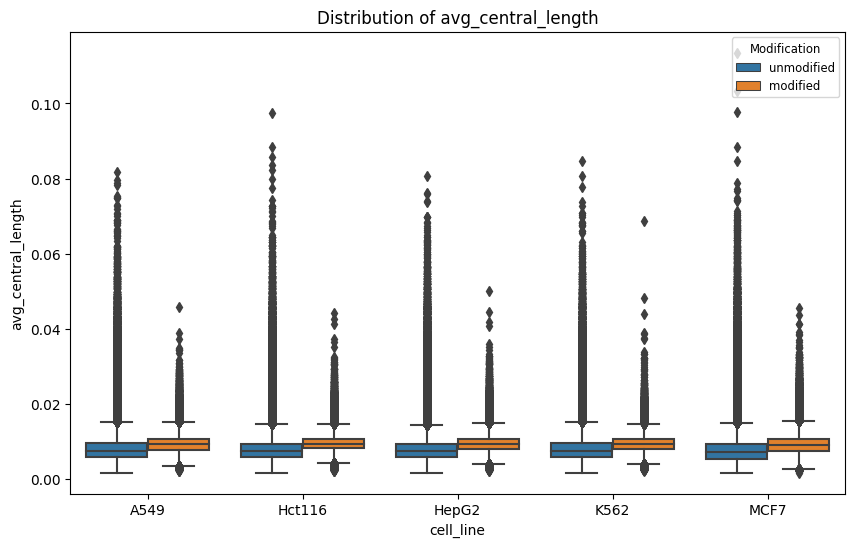

In [107]:
plt.figure(figsize=(10, 6))  # Adjust the size as necessary.
ax = sns.boxplot(data=final_df, x='cell_line', y='avg_central_length', hue='label')
# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['unmodified', 'modified']
leg = ax.legend(handles, new_labels, title='Modification', loc='upper right', fontsize='small')
plt.setp(leg.get_title(), fontsize='small')
plt.title(f"Distribution of avg_central_length")
plt.show()

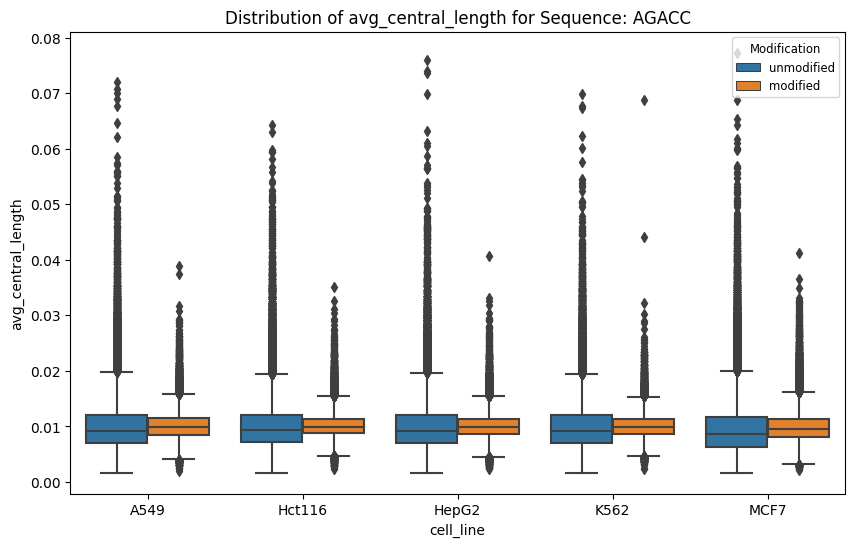

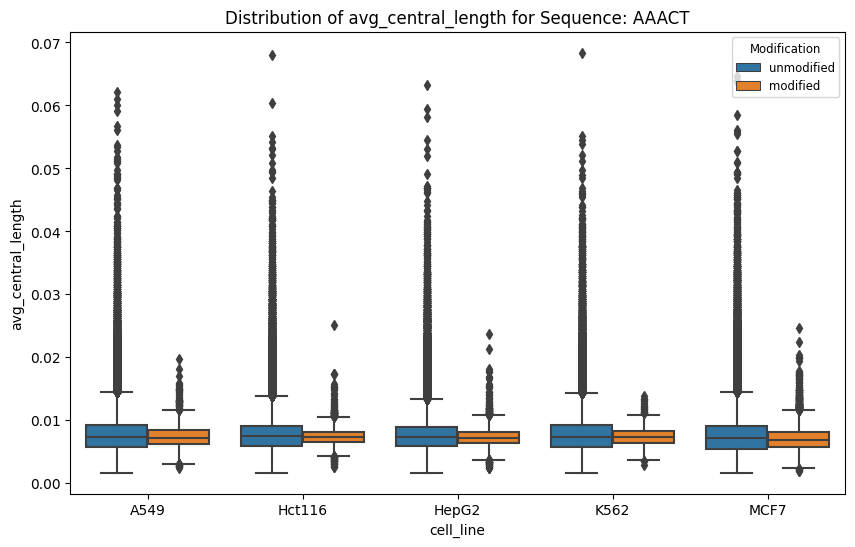

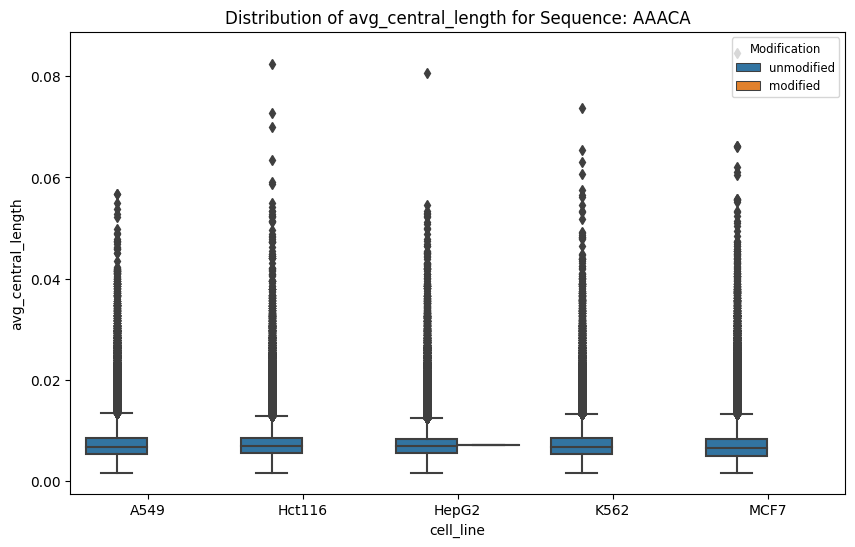

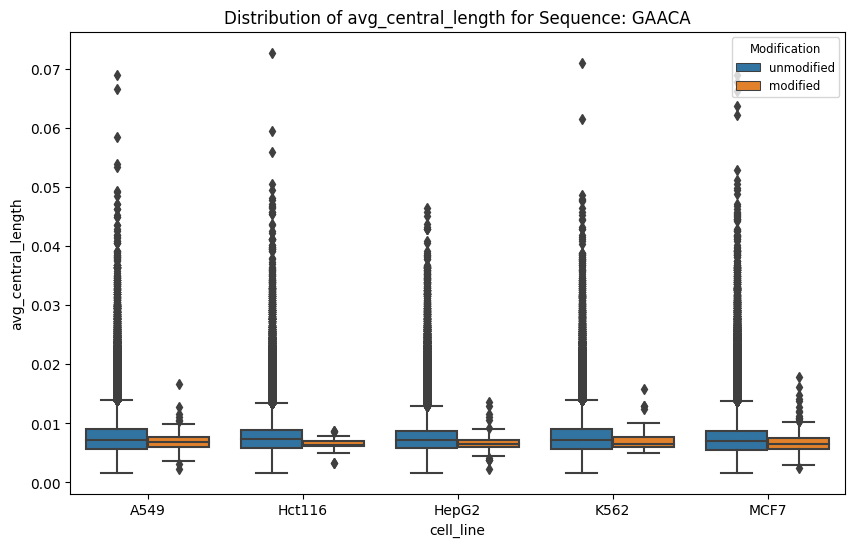

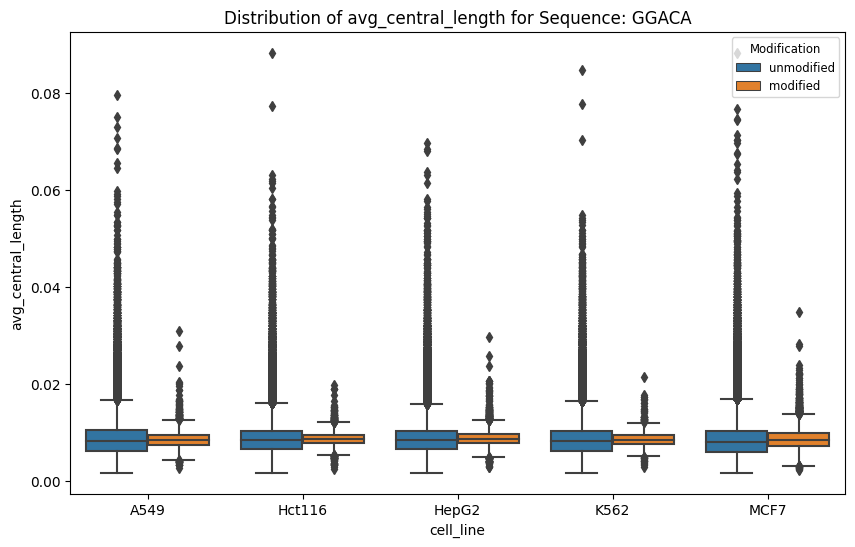

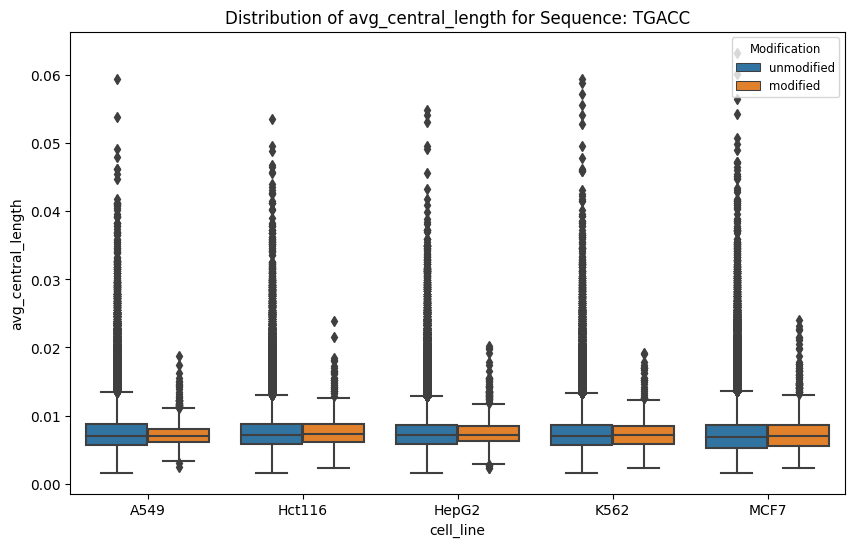

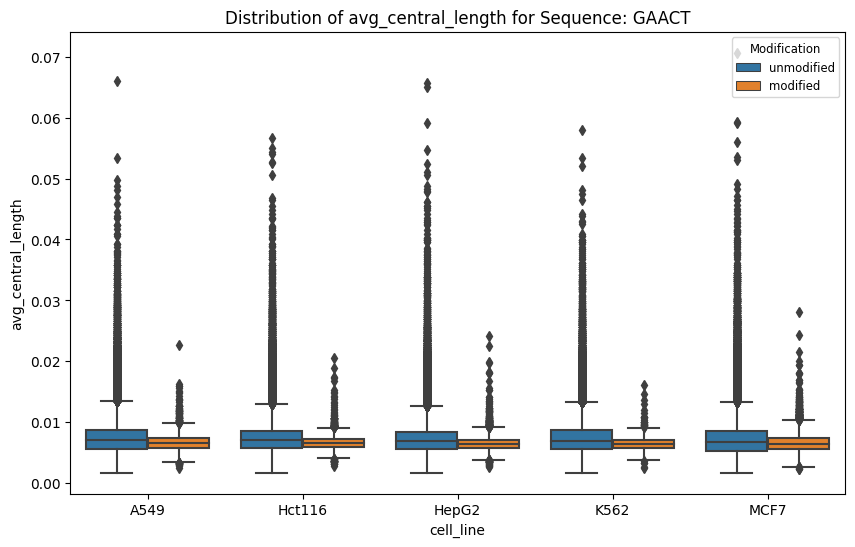

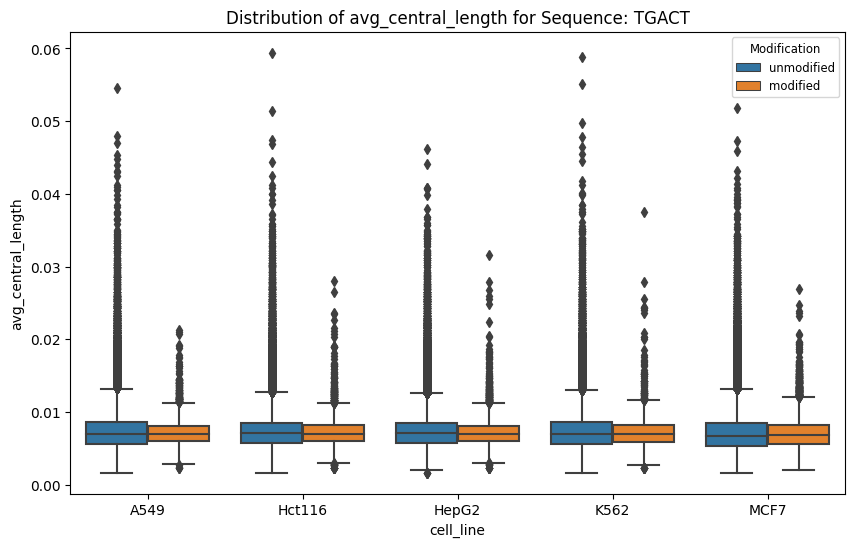

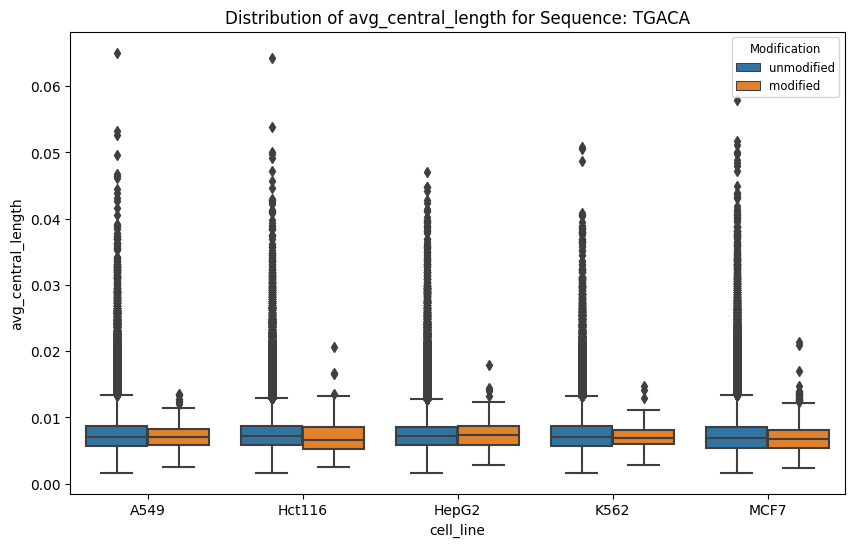

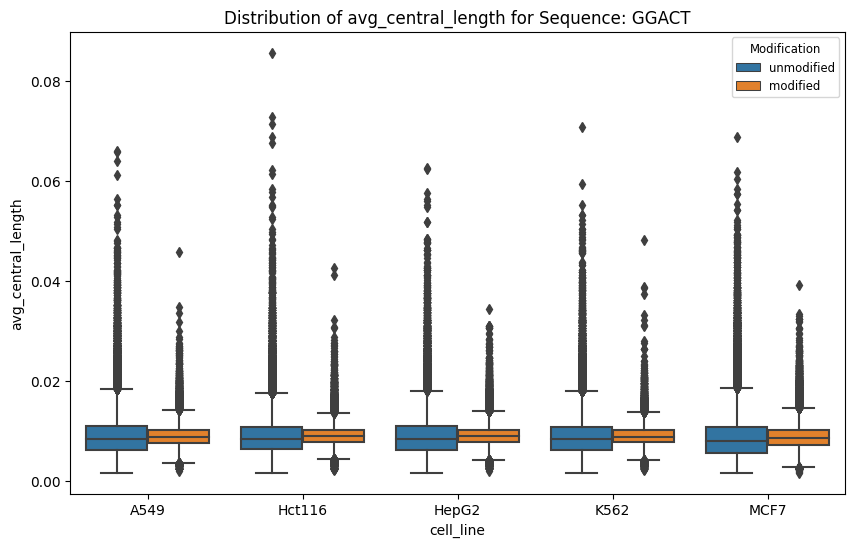

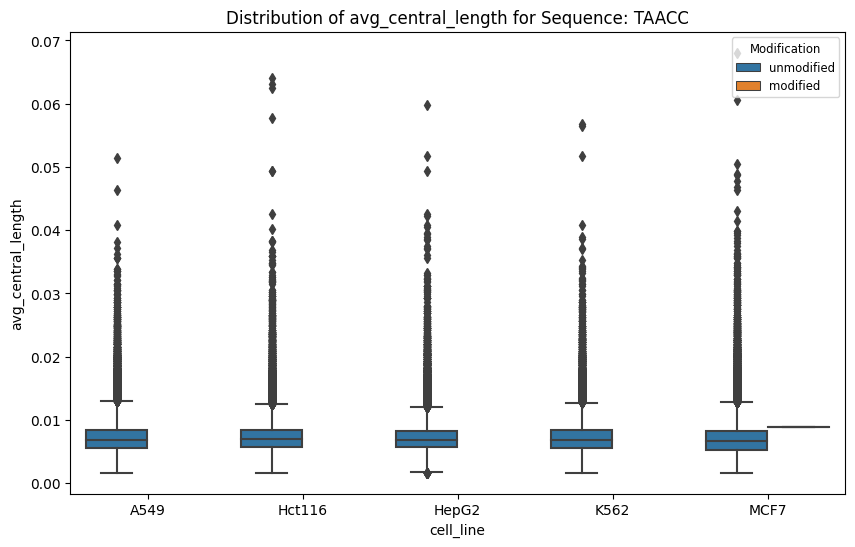

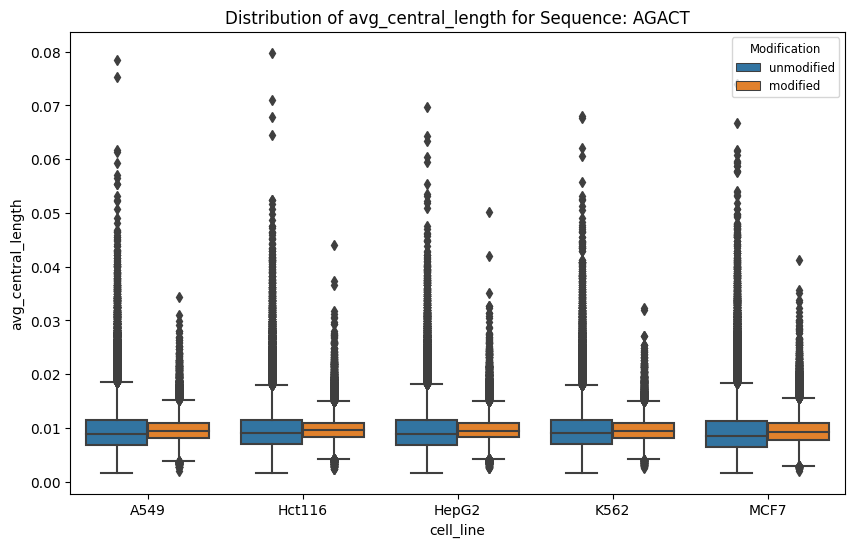

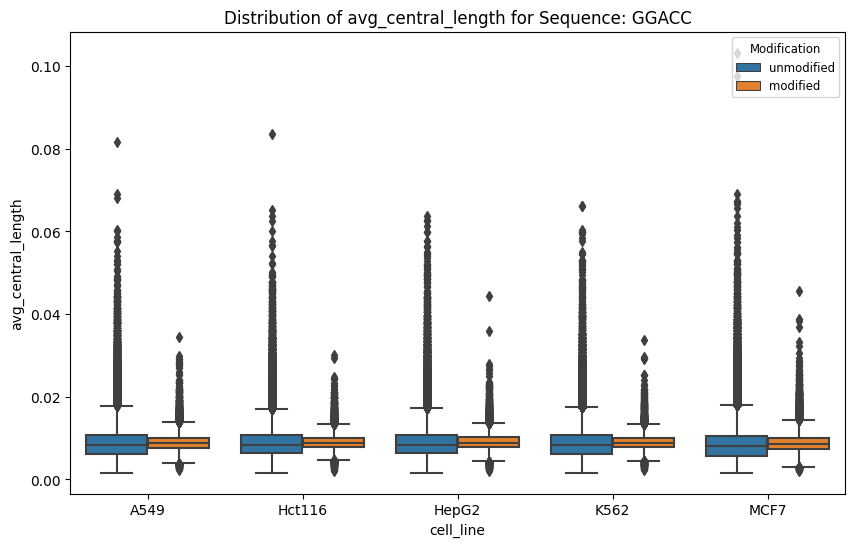

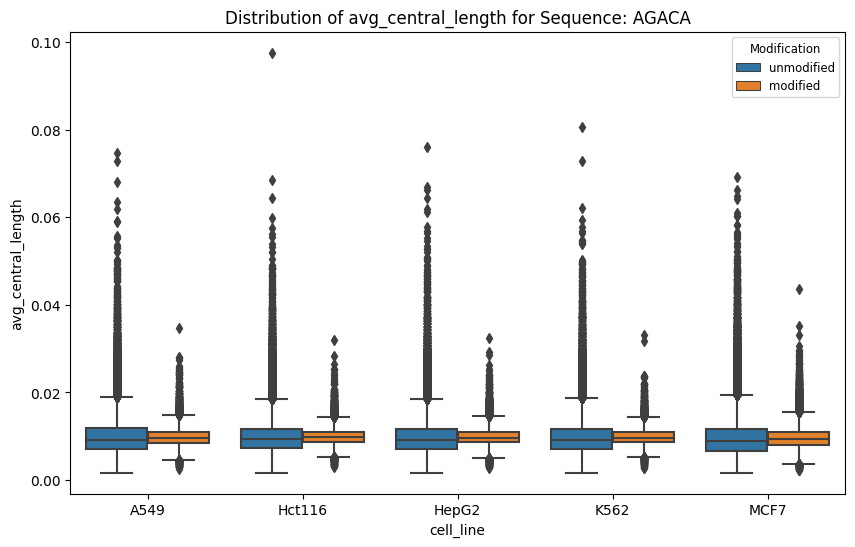

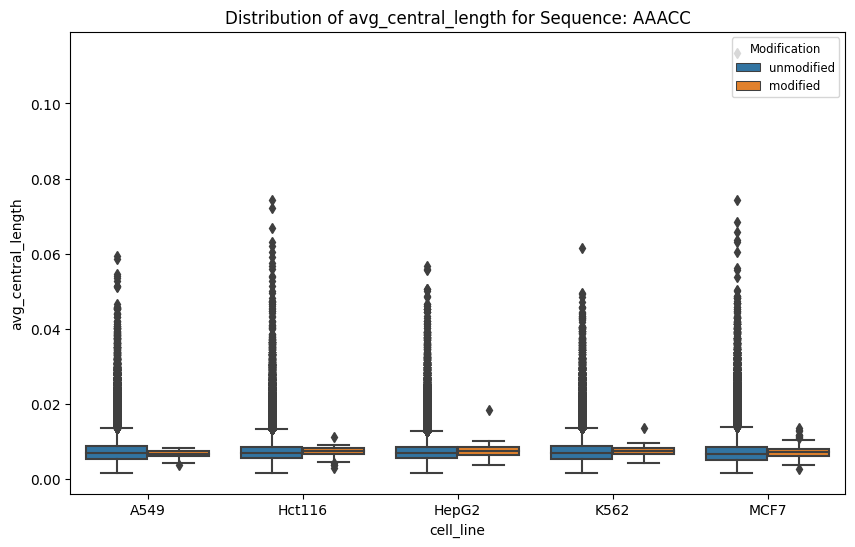

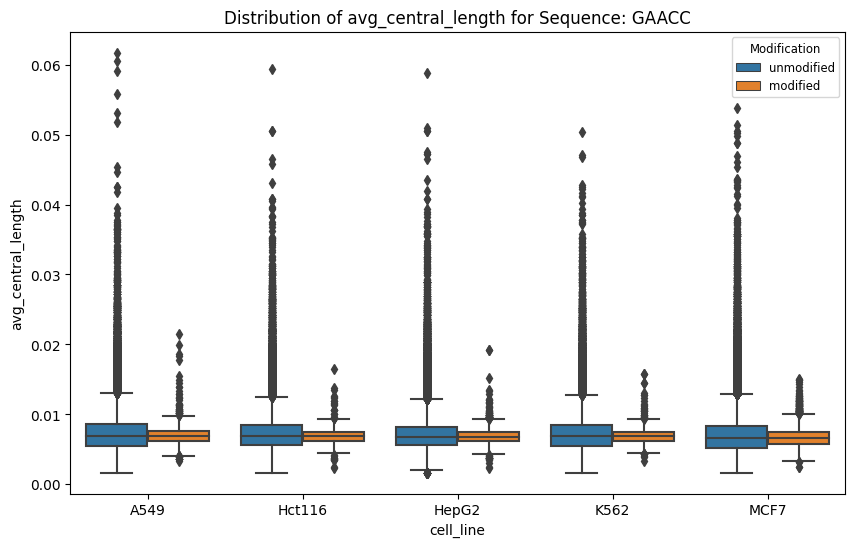

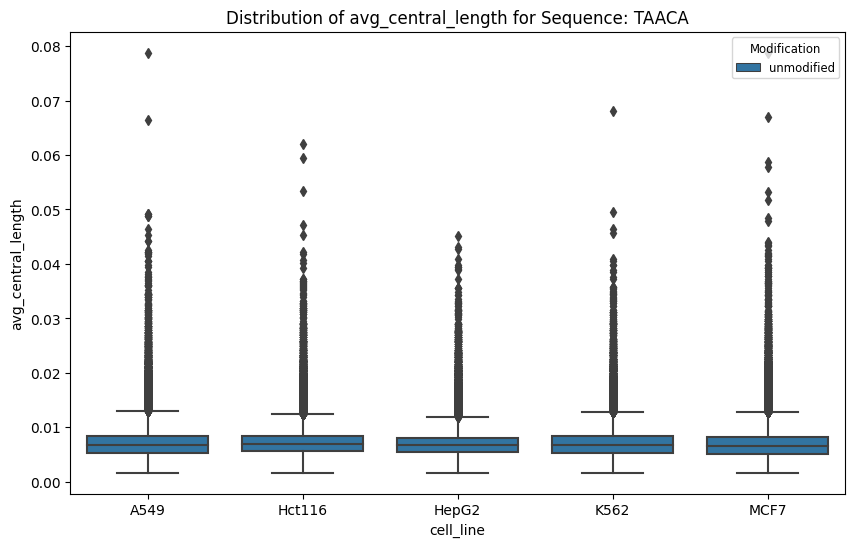

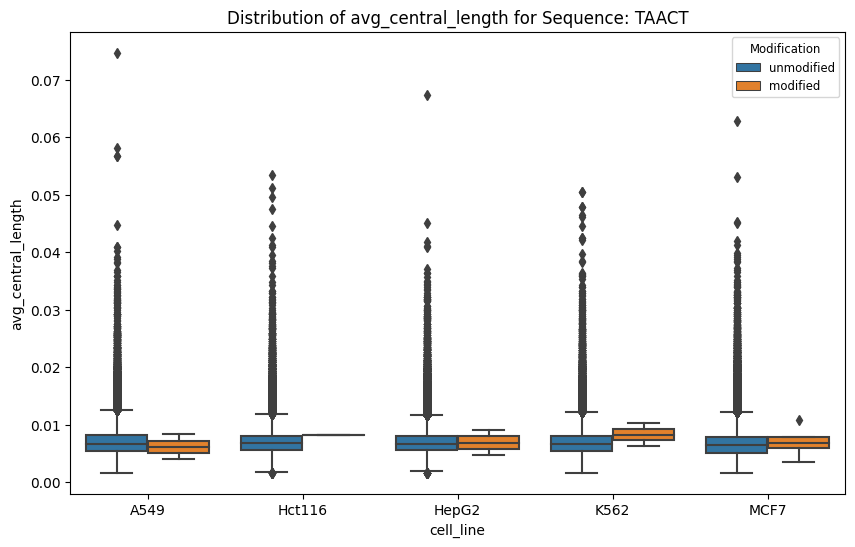

In [108]:
for sequence in final_df['central_sequence'].unique():
    plt.figure(figsize=(10, 6))  
    df_filtered = final_df[final_df['central_sequence'] == sequence]
    ax = sns.boxplot(data=df_filtered, x='cell_line', y='avg_central_length', hue='label')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['unmodified', 'modified']
    leg = ax.legend(handles, new_labels, title='Modification', loc='upper right', fontsize='small')
    plt.setp(leg.get_title(), fontsize='small')

    plt.title(f"Distribution of avg_central_length for Sequence: {sequence}")

    plt.show()


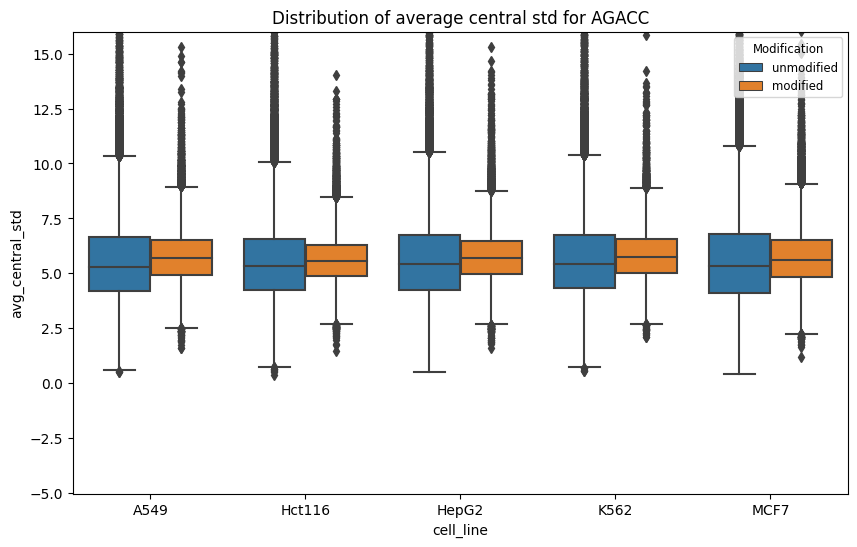

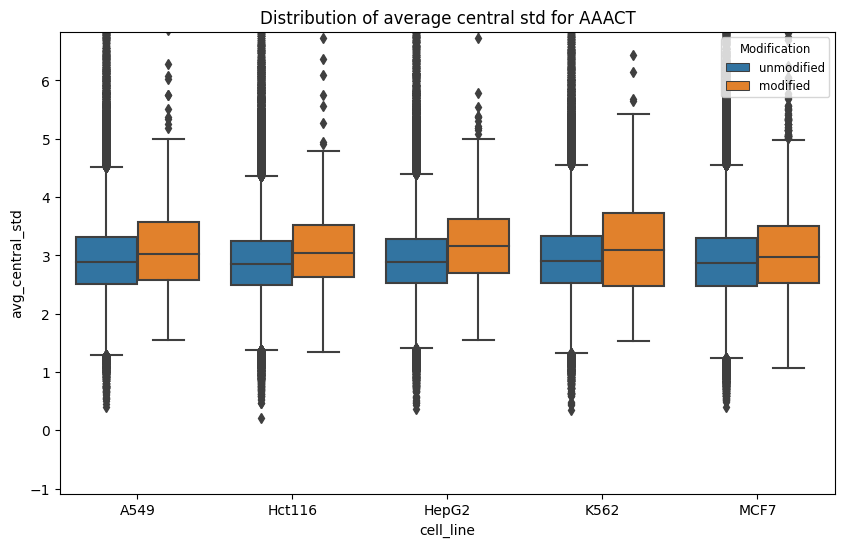

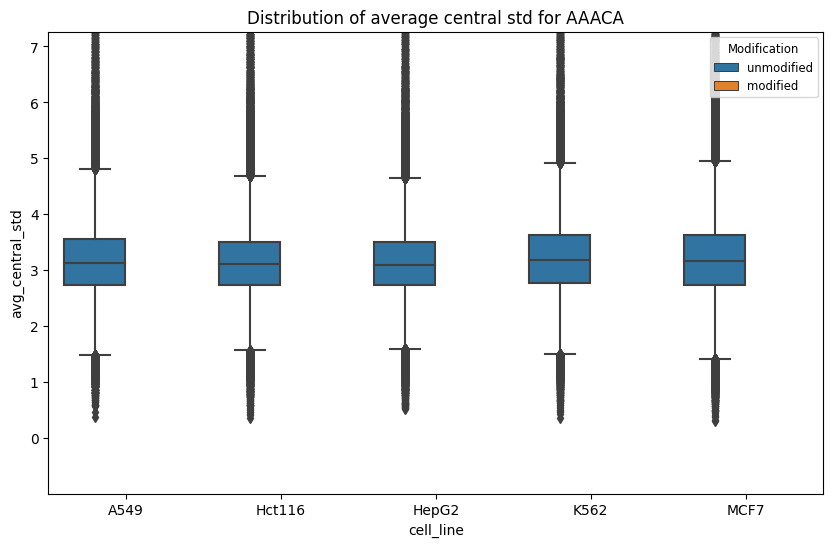

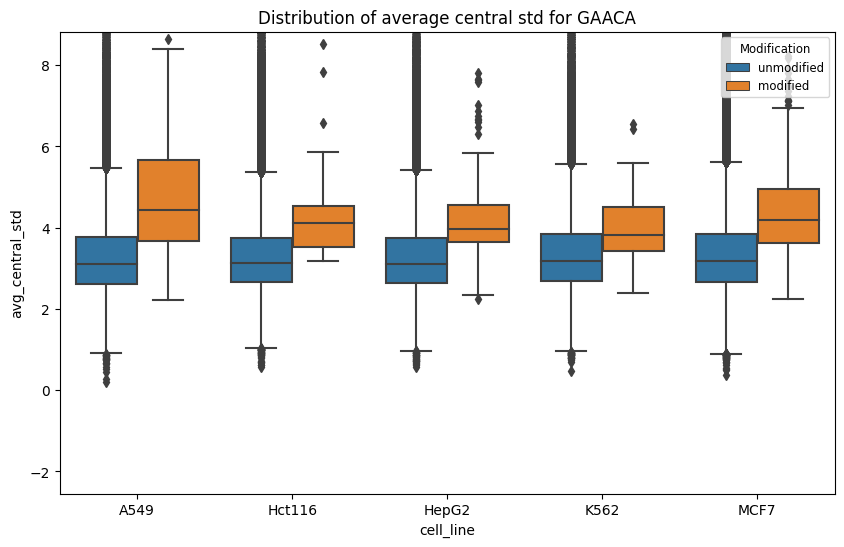

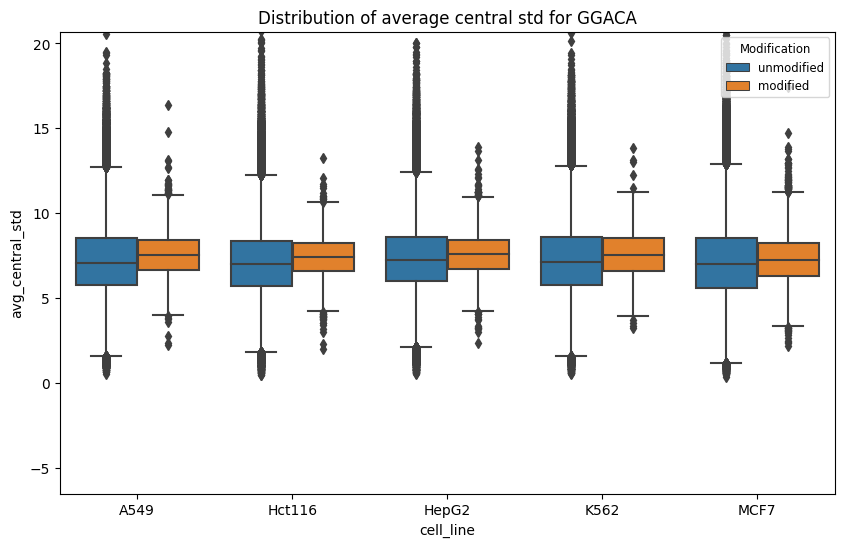

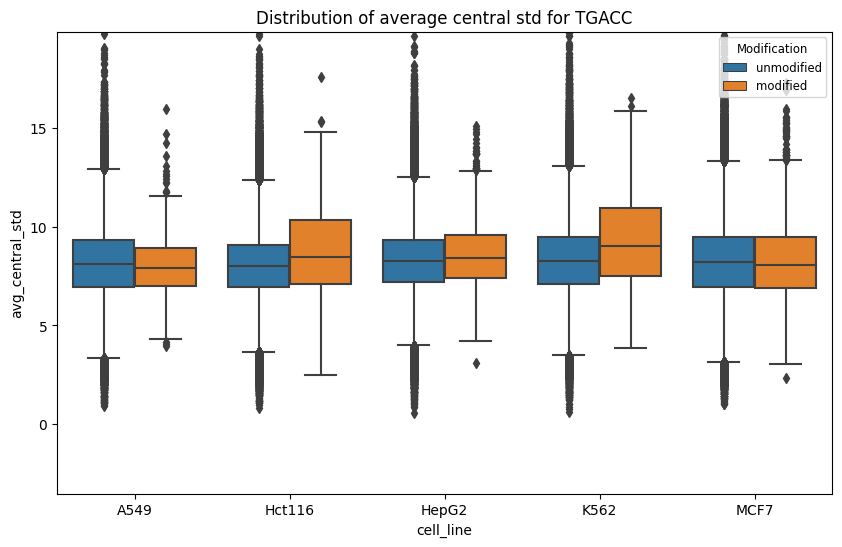

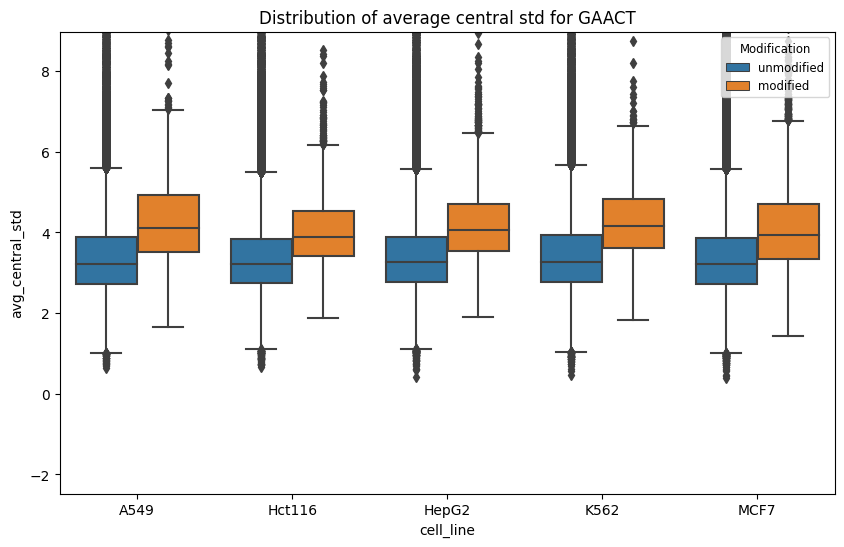

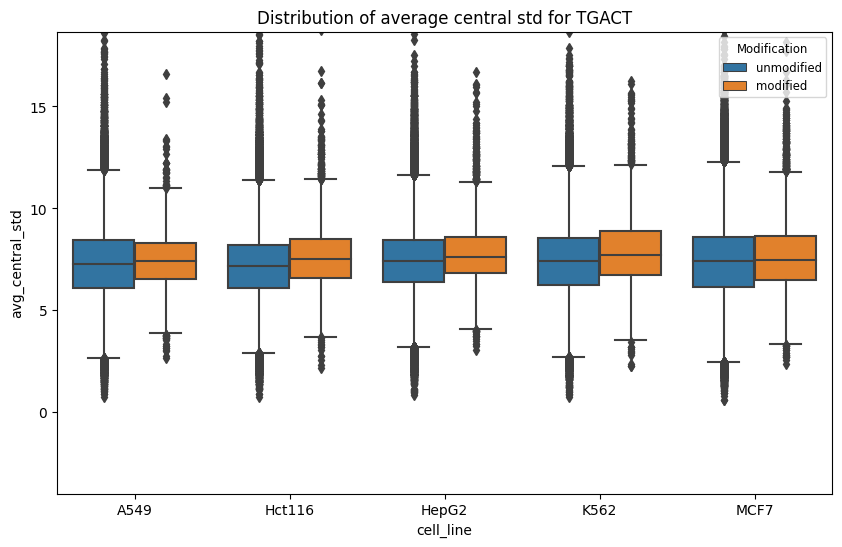

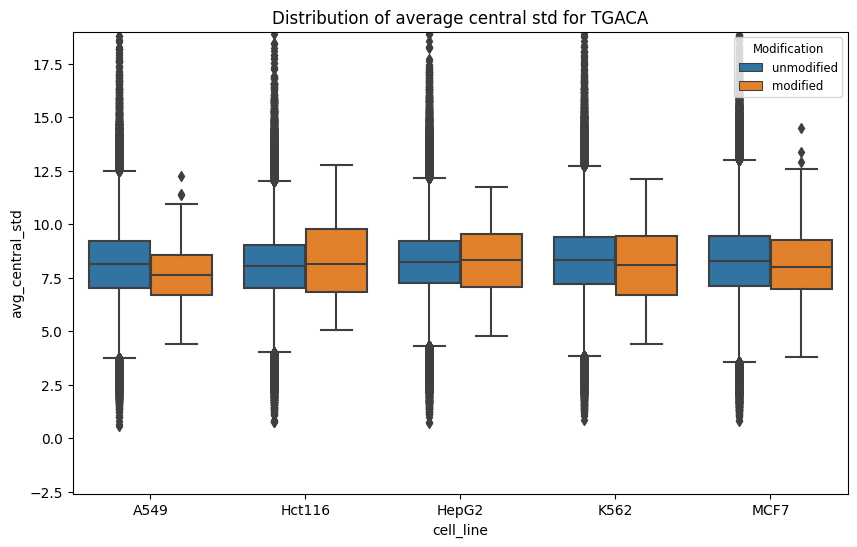

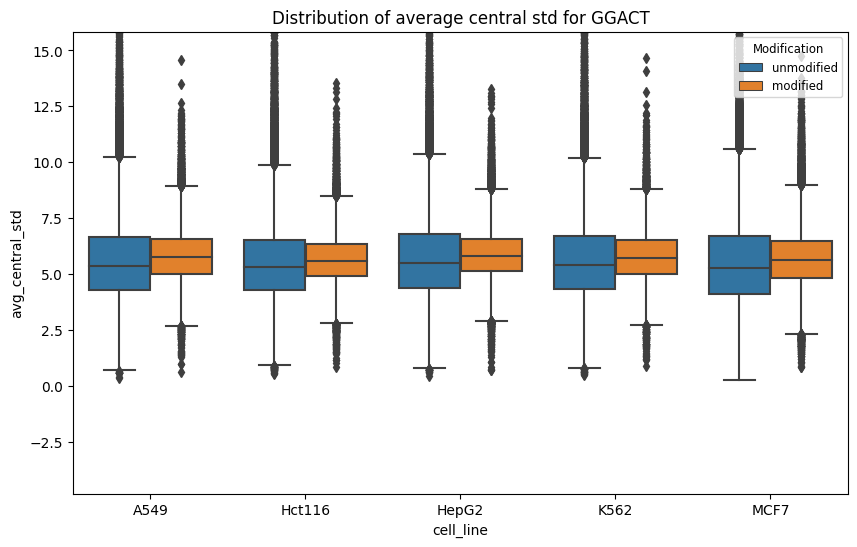

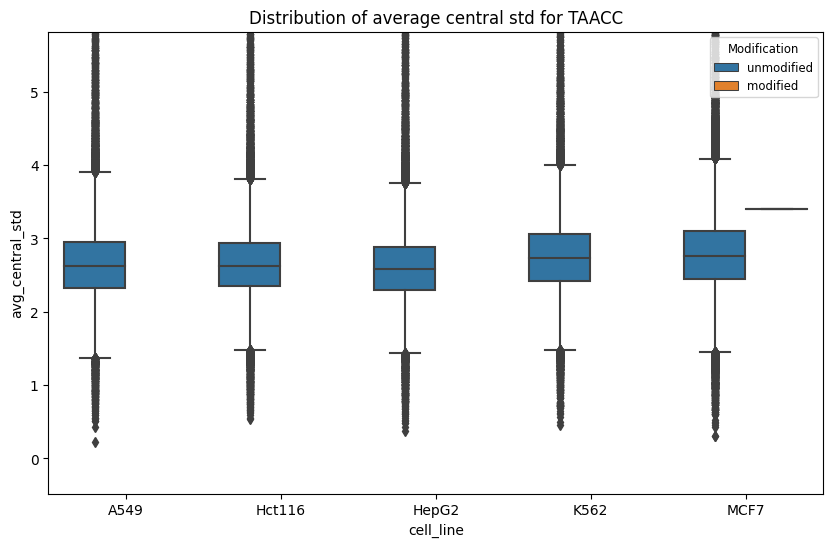

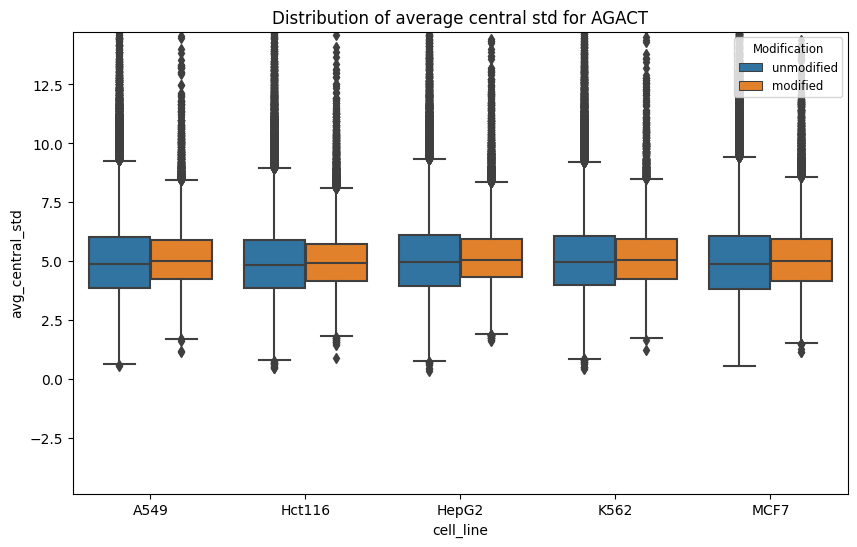

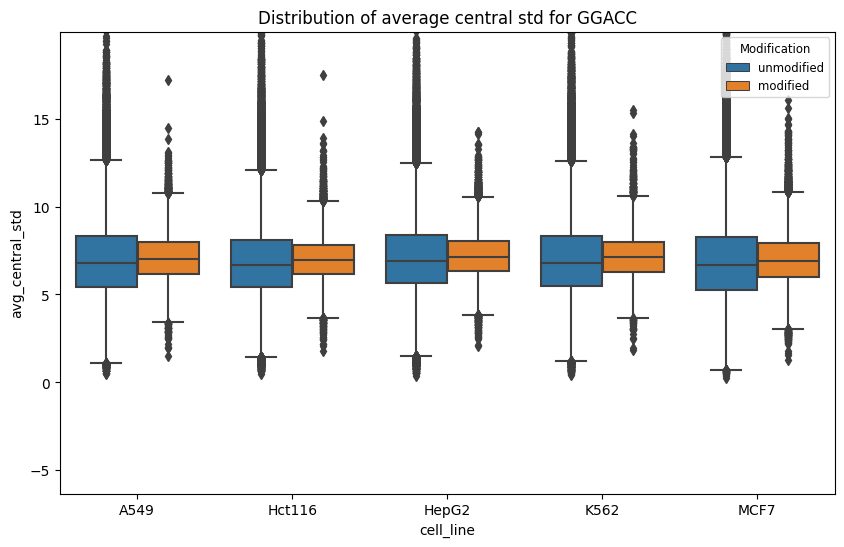

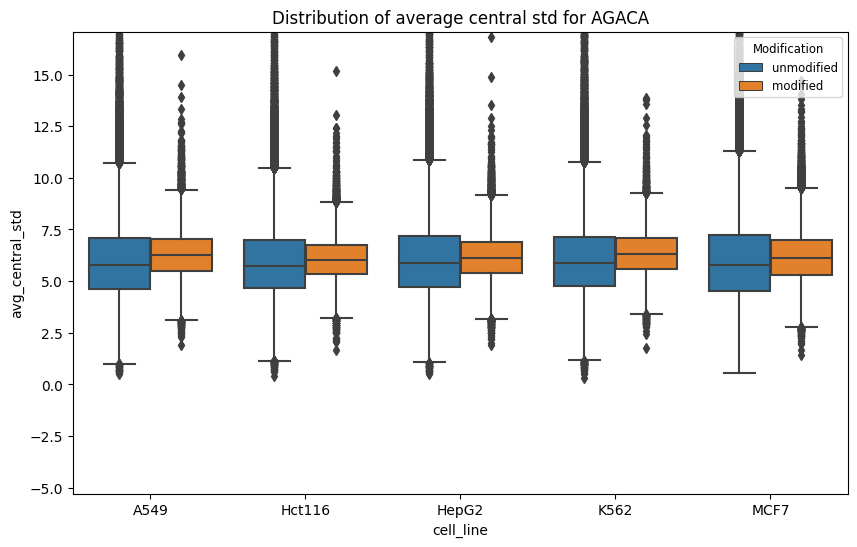

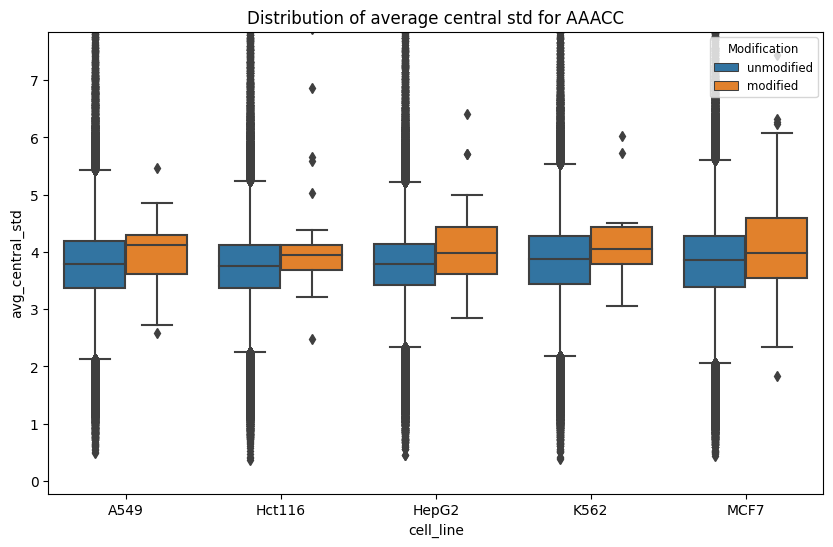

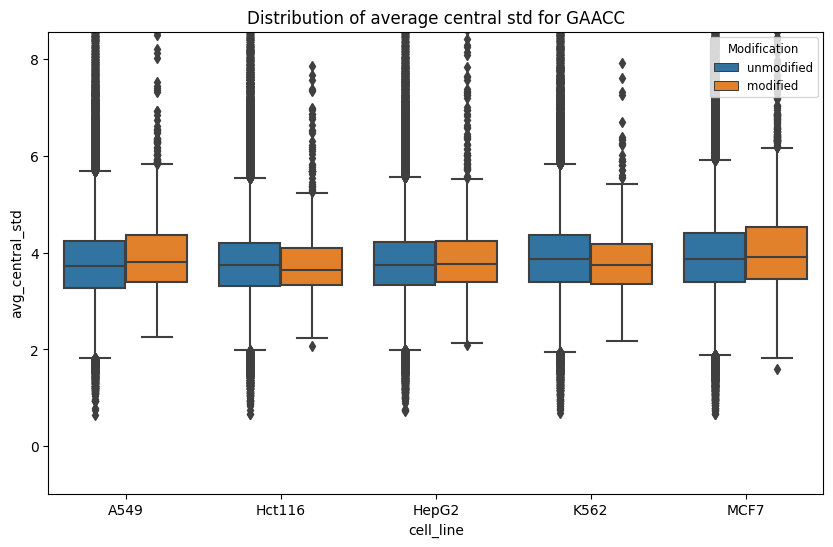

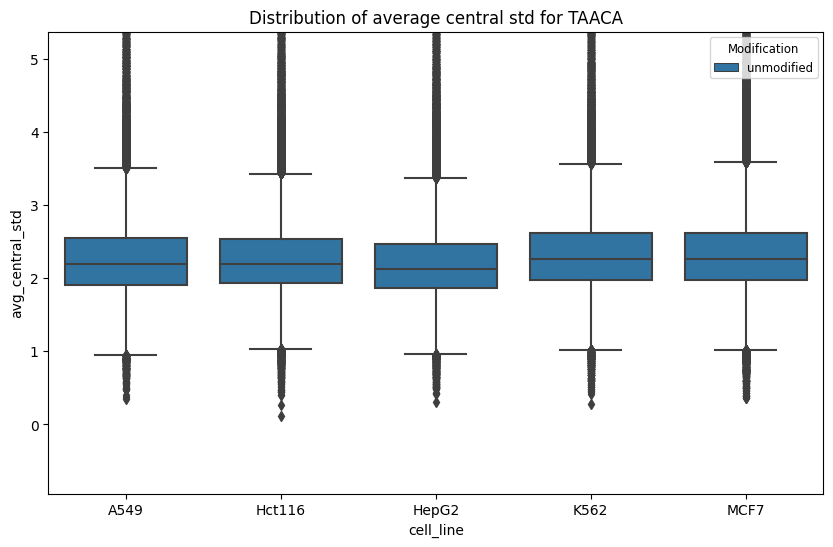

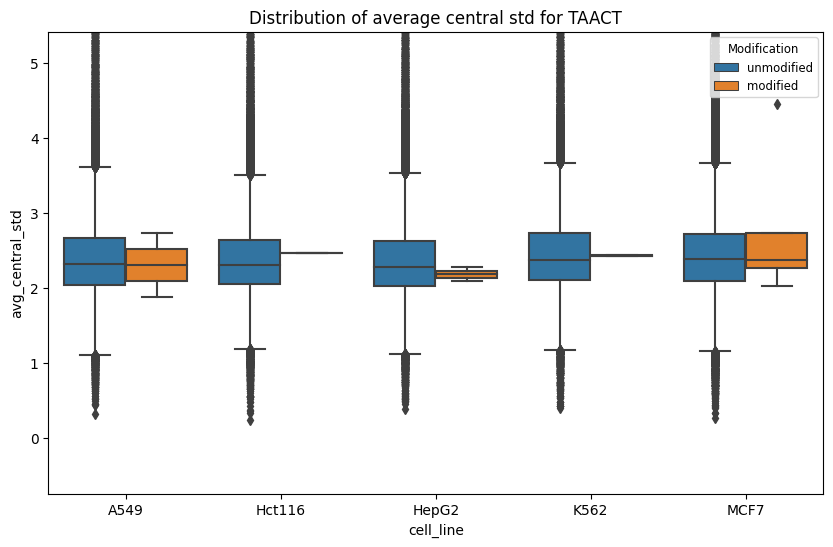

In [101]:
for sequence in final_df['central_sequence'].unique():
    plt.figure(figsize=(10, 6))  
    df_filtered = final_df[final_df['central_sequence'] == sequence]
    ax = sns.boxplot(data=df_filtered, x='cell_line', y='avg_central_length', hue='label')

    # Adjust the size to enlarge the main box a bit, some outliers is then out of box.. 
    Q1 = df_filtered['avg_central_std'].quantile(0.25)
    Q3 = df_filtered['avg_central_std'].quantile(0.75)
    IQR = Q3 - Q1
    median = df_filtered['avg_central_std'].median()
    ax.set_ylim(median - 5 * IQR, median + 5 * IQR)

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['unmodified', 'modified']
    leg = ax.legend(handles, new_labels, title='Modification', loc='upper right', fontsize='small')
    plt.setp(leg.get_title(), fontsize='small')

    plt.title(f"Distribution of average central std for {sequence}")

    plt.show()


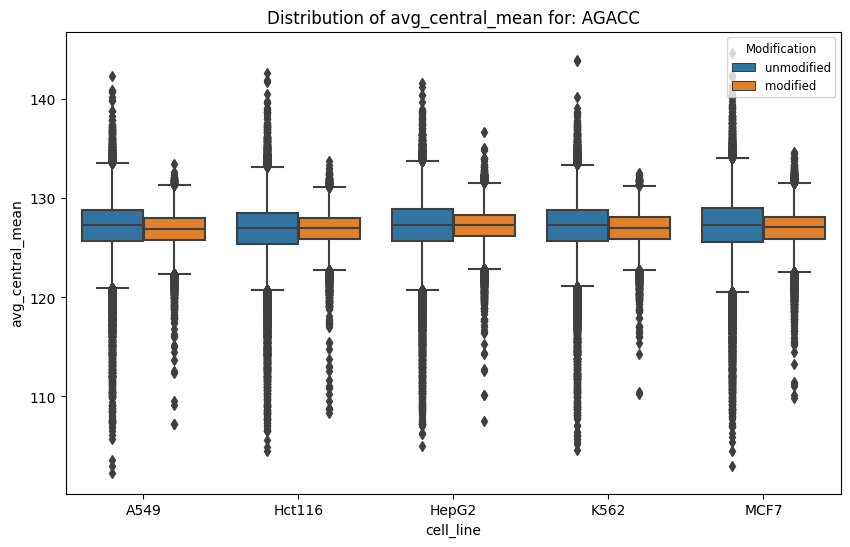

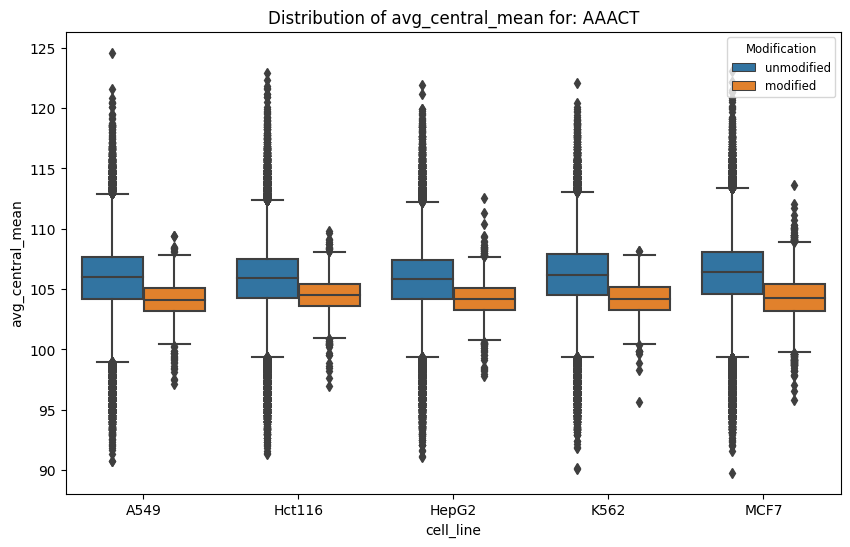

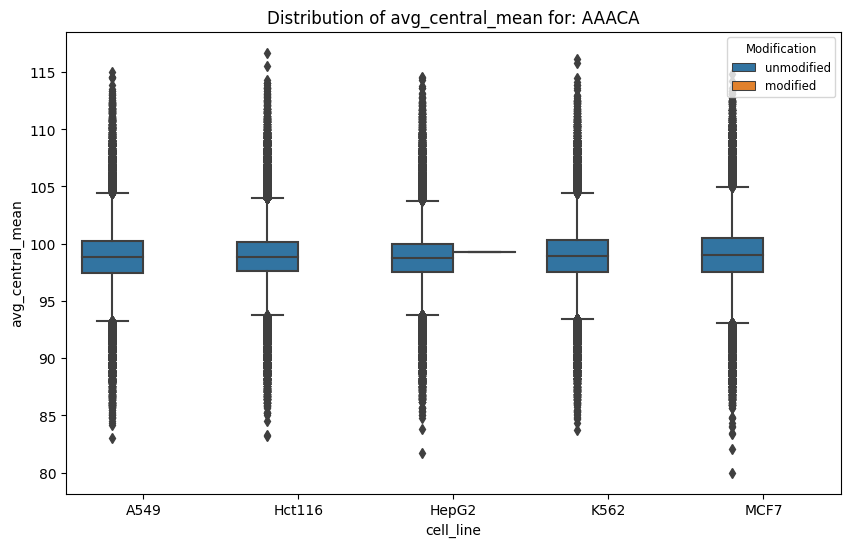

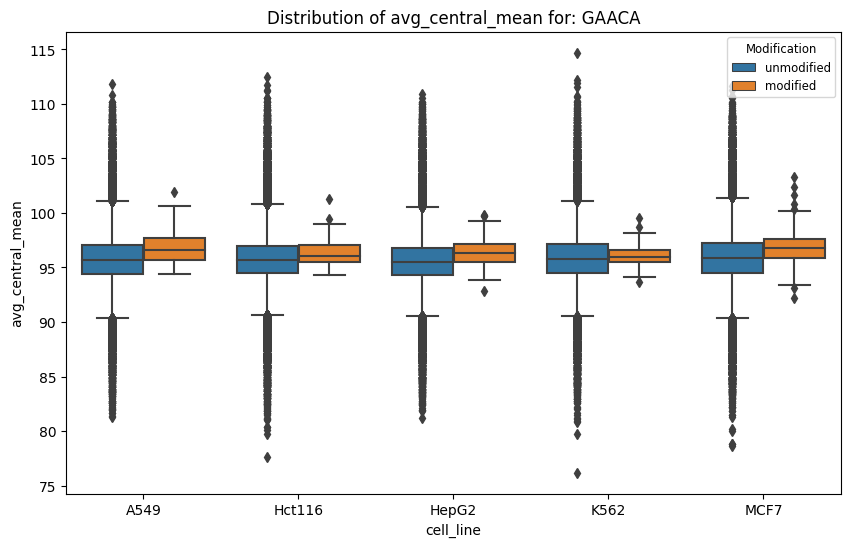

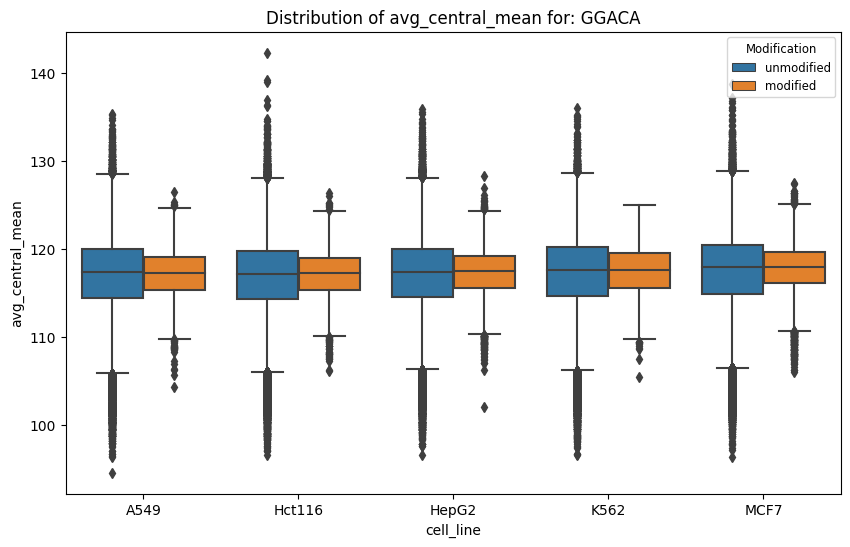

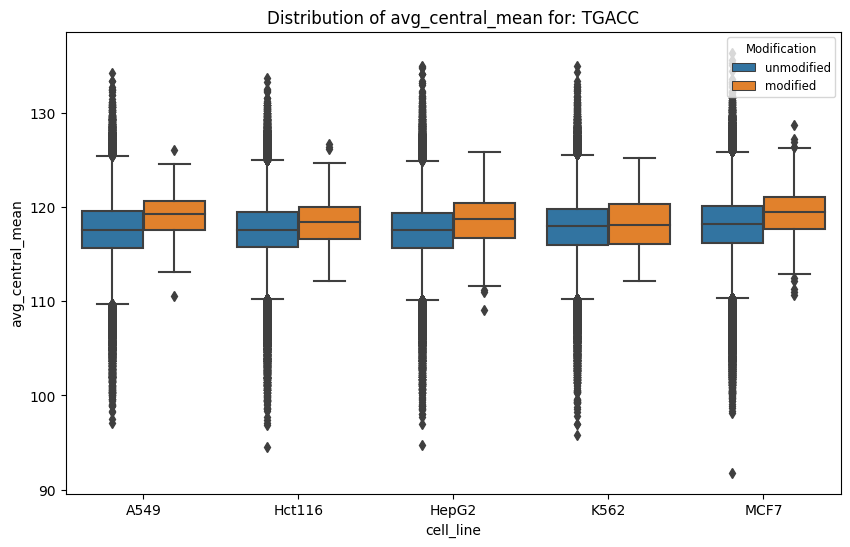

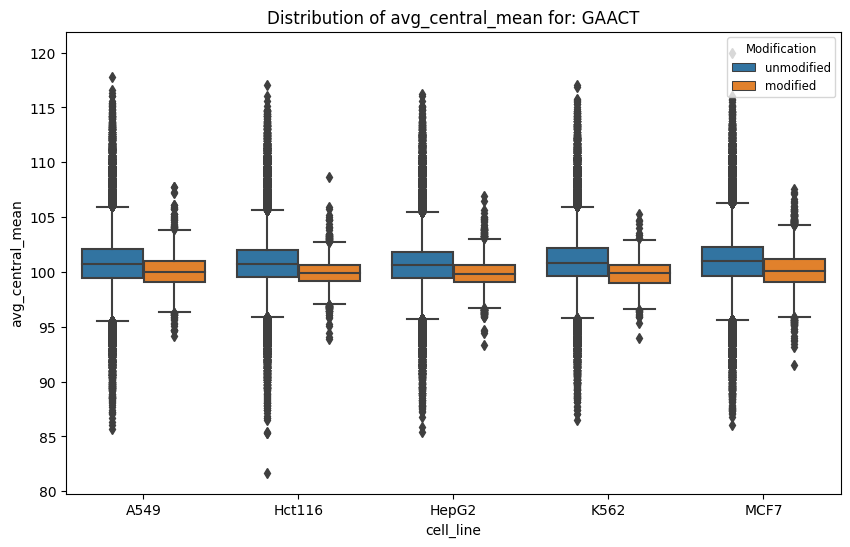

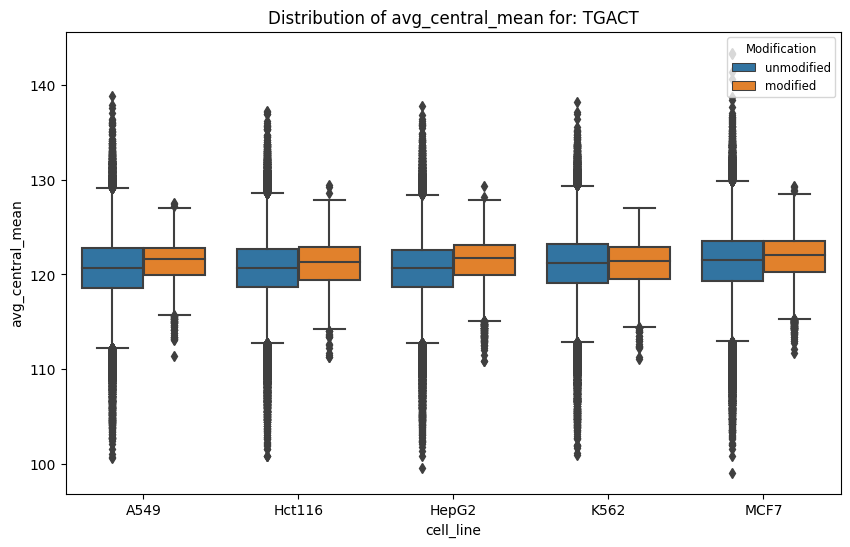

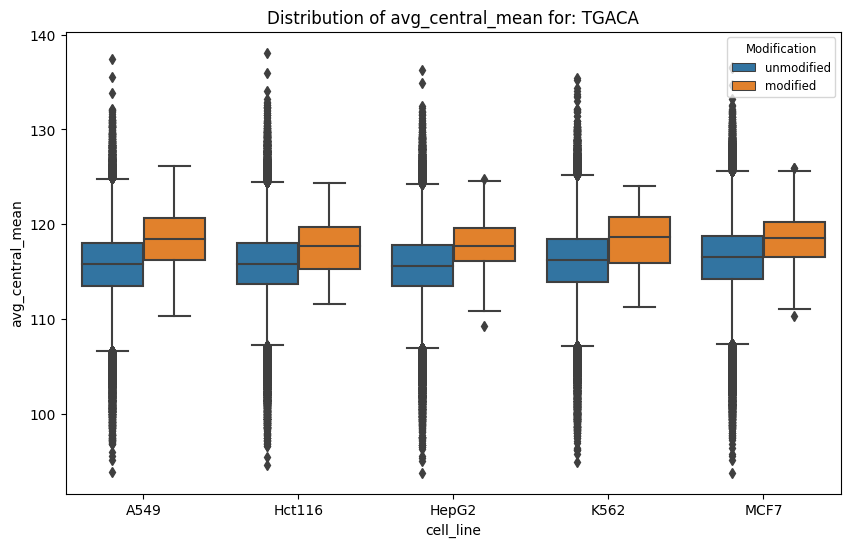

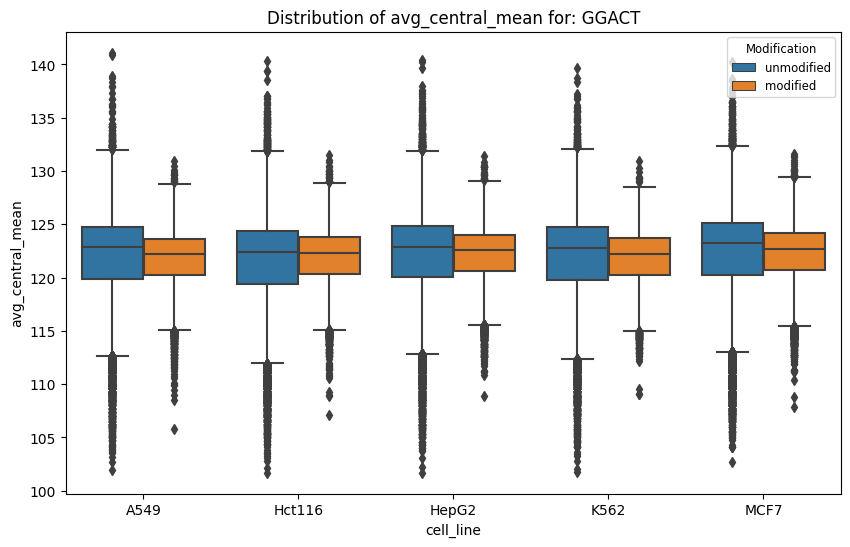

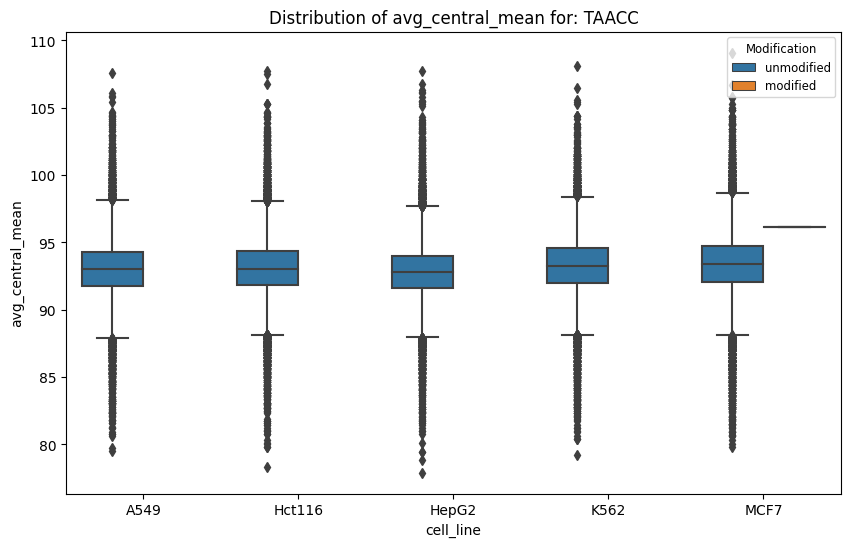

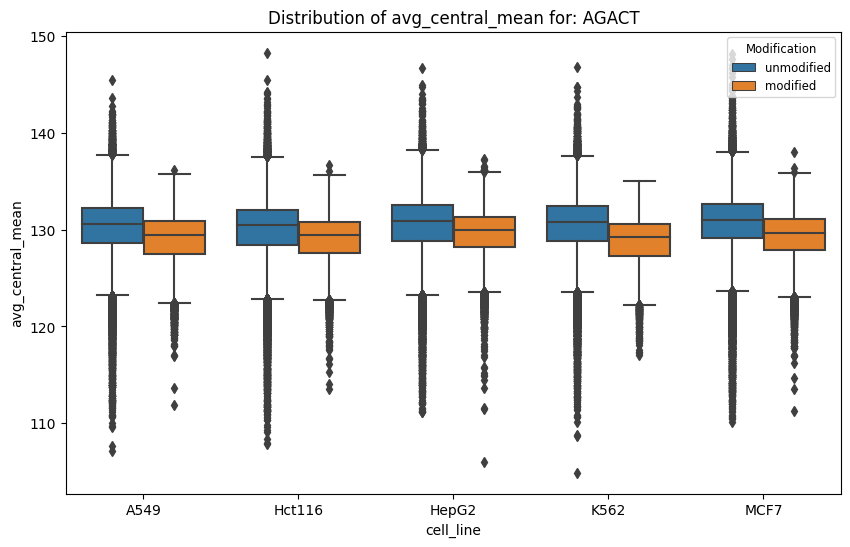

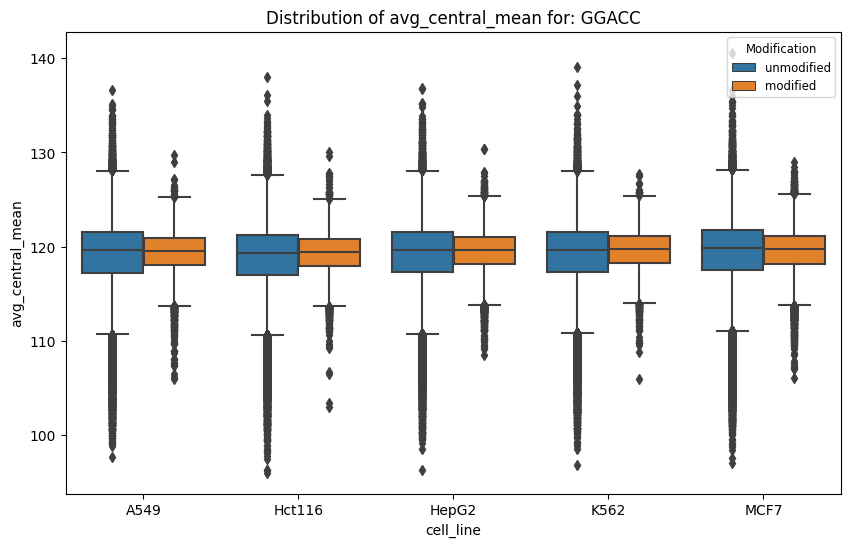

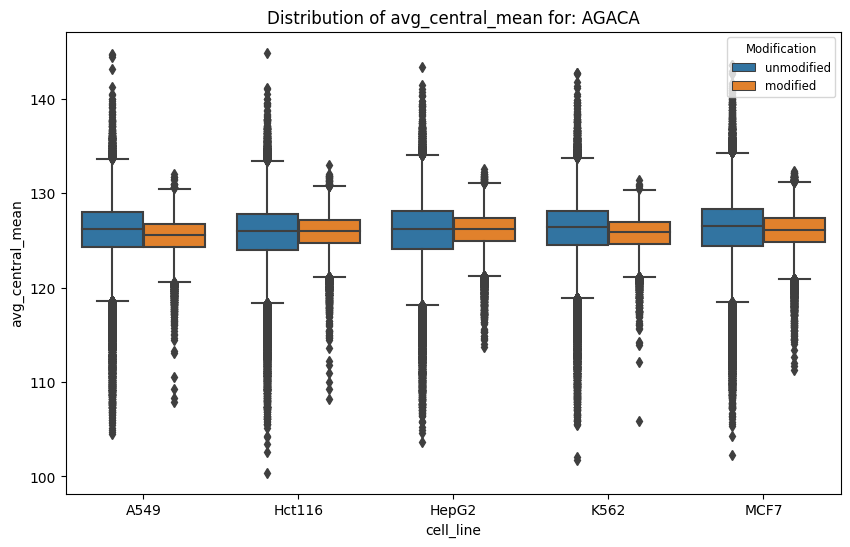

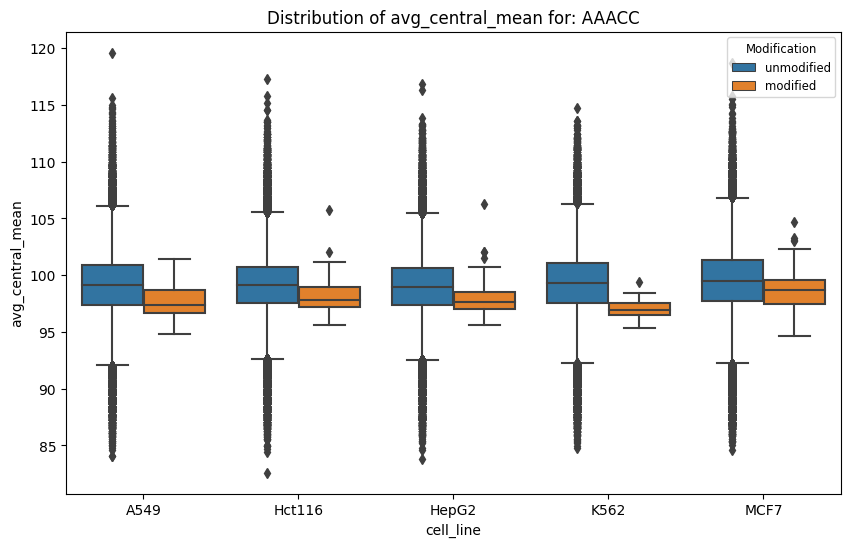

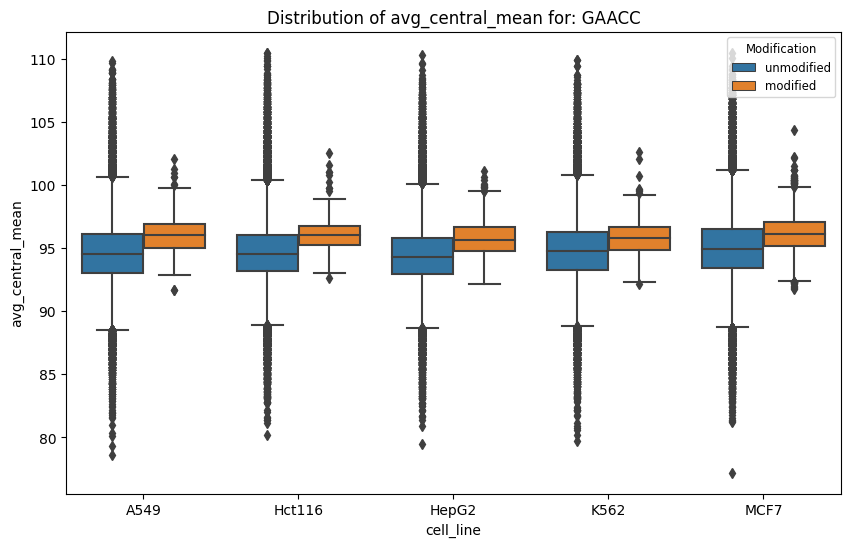

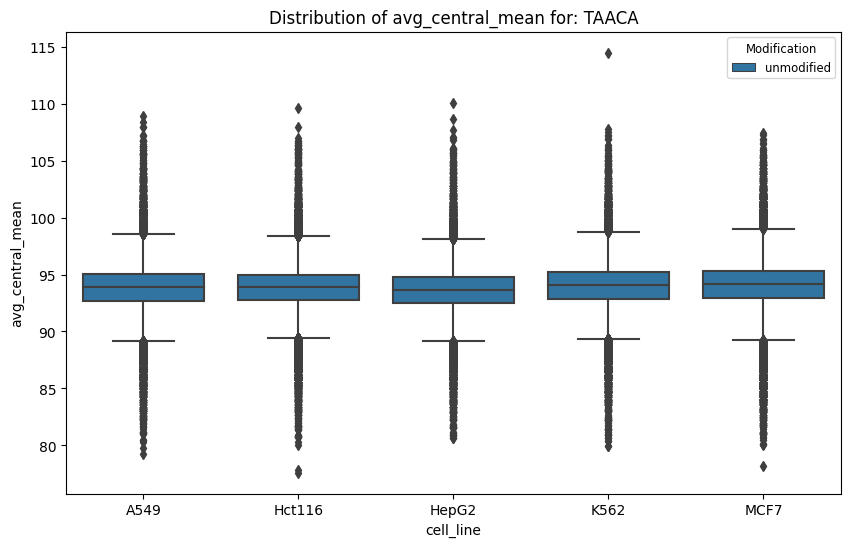

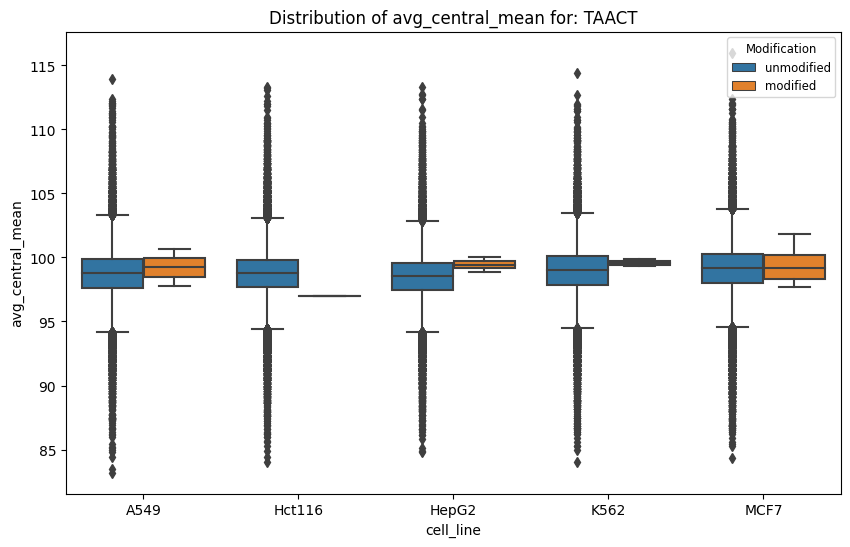

In [100]:
# for central mean 
for sequence in final_df['central_sequence'].unique():
    plt.figure(figsize=(10, 6))  
    df_filtered = final_df[final_df['central_sequence'] == sequence]
    ax = sns.boxplot(data=df_filtered, x='cell_line', y='avg_central_mean', hue='label')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['unmodified', 'modified']
    leg = ax.legend(handles, new_labels, title='Modification', loc='upper right', fontsize='small')
    plt.setp(leg.get_title(), fontsize='small')

    plt.title(f"Distribution of avg_central_mean for: {sequence}")

    plt.show()

### Key Findings: 
---
1.  Different sequences show different performance for average central mean. For example, modified transcript for TGACA has higher median avg_central_mean than unmodified transcript; but for AGACT, modified transcript has lower median avg_central_mean than unmodified transcript. 

2. Behaviour for same sequence and same feature are similar across cell lines. As shown by the same 2 graphs above, we can see that for all 5 cell lines, the median of avg_central_mean for modified transcript is either all higher than / lower than / about the same as that for unmosified transcript. This is also true in general for other features such as avg_central_length (e.g. AGACC) 
However, we do have exception like TAACT, where K562 has a higher median avg_central_length for modified but A549 has a lower median for unmodified. 